In [1]:
"""
Bibliography
- https://ine.es/en/index.htm
"""

'\nBibliography\n- https://ine.es/en/index.htm\n'

In [18]:
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:


# new borns Spain 2022
nBorn = 329261

In [3]:
# reduce , every agent here is equivalent to "people_per_agent" persons
people_per_agent = 1000

# Spain population
# pop = 48592909
# pop = round(pop/people_per_agent)

In [4]:
# distributions

# death by age
# multiplier of the death distribution to match the present value of 464,000
death_factor = 4.19
fileName = 'death_distribution.csv'
df_da = pd.read_csv(fileName)
df_da['death_prob'] = df_da['death_prob']*death_factor
death_distri = df_da.to_dict()['death_prob'] 

In [5]:
# population distribution
fileName = 'population_distribution.csv'
df_pop = pd.read_csv(fileName, usecols=[1,2,3])


In [6]:
# get distribution of births
birth_factor = 1.03
fileName = 'birth_distribution.csv'
df_birth = pd.read_csv(fileName)
df_birth['prob_birth'] = df_birth['prob_birth']*birth_factor

In [7]:
# prepare the data
dict_birth = df_birth.set_index('age').to_dict()['prob_birth']

In [8]:
class Human:
    def __init__(self, age, sex, sons=0):
        self.age = age
        self.sex = sex.lower()  # Ensure sex is stored in lowercase
        self.alive = True
        self.sons = sons


    def death(self):
        # use the distribution of death
        if self.age <= 100:
            if random.random() < death_distri[self.age]:
                self.alive = False  # Probability of death is 0.5
        else:
            self.alive = False   # go to False as (age > 100)
    
    
    def erase_from_list(self, humans):
        # delete from list
        if not self.alive:
            humans.remove(self)  # Remove from list if dead
            res = 1
        else:
            res = 0
        return res  # Optional: Return the updated humans list

        
    # at every step a year is added
    def age_up(self):
        self.age += 1  # Increase age by 1 only if alive
        
    # procreate more people
    def procreate(self, humans):
        if (self.sex == 'female'):
            if (self.age in list(dict_birth.keys())):
                if random.random() < dict_birth[self.age]:
                    s1 = random.choice(['male', 'female'])
                    humans.append(Human(-1, s1, 0))
#                     print('hey')

    # productive age, outputs 1 if adult that can work, zero other wise
    def productive_age(self):
        if (self.age >= 18 and self.age <68):
            return 1
        else:
            return 0


In [9]:
# processing data

# reducing the size of the population
df_pop['Total'] = round(df_pop['Total']/people_per_agent)

print('Initial population: ', df_pop['Total'].sum()*people_per_agent)

Initial population:  48084000.0


In [10]:
# Create a list to store the humans, initial conditions
humans = []
ages = list(df_pop.age.unique())

# Create number humans with the ages and sexes of the distributions
for s1 in ['male', 'female']:
    for a1 in ages:
        t1 = int(df_pop.loc[((df_pop['sex'] == s1) & 
                (df_pop['age'] == a1)), 
               'Total'])
        for _ in range(t1):
            humans.append(Human(a1, s1, -1))
            

In [11]:
# Looping through all humans, see evolution of population
data = []
for yr in range(1, 27):
    deaths = 0
    productive_people = 0
    for human in humans:
        human.age_up() # simulation of getting old
        human.death()  # Simulate death for all humans
        human.procreate(humans) # births
        deaths += human.erase_from_list(humans)
        productive_people += human.productive_age()
    
    # adding the data
    data.append([2024+yr, len(humans), deaths, len([i for i in humans if i.age == 0]), 100*round(productive_people/len(humans), 2)])
    
    # population total
    print('Year: ', 2024+yr, 'Population: ', len(humans))
    print('number of deaths: ', deaths)
    print('number of new born: ', len([i for i in humans if i.age == 0]))
    print('Porportion of productive population according to age: ', 100*round(productive_people/len(humans), 2))
    print("-----")
    print("")
    
    

Year:  2025 Population:  47984
number of deaths:  457
number of new born:  355
Porportion of productive population according to age:  66.0
-----

Year:  2026 Population:  47831
number of deaths:  476
number of new born:  324
Porportion of productive population according to age:  66.0
-----

Year:  2027 Population:  47669
number of deaths:  497
number of new born:  333
Porportion of productive population according to age:  66.0
-----

Year:  2028 Population:  47514
number of deaths:  483
number of new born:  327
Porportion of productive population according to age:  66.0
-----

Year:  2029 Population:  47355
number of deaths:  499
number of new born:  339
Porportion of productive population according to age:  66.0
-----

Year:  2030 Population:  47186
number of deaths:  481
number of new born:  307
Porportion of productive population according to age:  66.0
-----

Year:  2031 Population:  46982
number of deaths:  512
number of new born:  311
Porportion of productive population according

In [17]:
df_res = pd.DataFrame(data, columns = ['yr', 'population', 'deaths', 'newBorn', 'productivityPop%'])

df_res

,yr,population,deaths,newBorn,productivityPop%
0,2025,47984,457,355,66.0
1,2026,47831,476,324,66.0
2,2027,47669,497,333,66.0
3,2028,47514,483,327,66.0
4,2029,47355,499,339,66.0
5,2030,47186,481,307,66.0
6,2031,46982,512,311,66.0
7,2032,46769,499,284,66.0
8,2033,46551,520,300,66.0
9,2034,46324,526,300,65.0


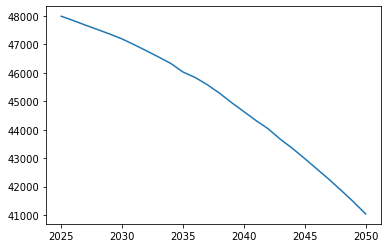

In [19]:
x = df_res['yr']
y = df_res['population']
plt.plot(x, y)
plt.show()

In [15]:
productive_people/len(humans)

0.5699702772499148